In [1]:
import polars as pl


In [2]:
df = pl.read_csv("1. users_data.csv")

In [3]:
df

UserID,Age,Gender,School Name,Grade
i64,i64,str,str,i64
1,11,"""Others""","""School10""",5
2,15,"""Male""","""School5""",9
3,11,"""Male""","""School13""",5
4,17,"""Male""","""School14""",11
5,17,"""Male""","""School6""",11
…,…,…,…,…
96,13,"""Male""","""School10""",7
97,14,"""Others""","""School8""",8
98,10,"""Others""","""School15""",4


In [4]:
df.describe()

statistic,UserID,Age,Gender,School Name,Grade
str,f64,f64,str,str,f64
"""count""",100.0,100.0,"""100""","""100""",100.0
"""null_count""",0.0,0.0,"""0""","""0""",0.0
"""mean""",50.5,12.66,null,null,6.66
"""std""",29.011492,3.21367,null,null,3.21367
"""min""",1.0,8.0,"""Female""","""School1""",2.0
"""25%""",26.0,10.0,null,null,4.0
"""50%""",51.0,13.0,null,null,7.0
"""75%""",75.0,15.0,null,null,9.0
"""max""",100.0,18.0,"""Others""","""School9""",12.0


The data as it is shows the following:

1. The ages goes from a min of 8 years to 18, so the dataset it is desing to detect cyberbulling into young ages up to teenagerhood.
2. other categorical data columns can be further analyze by categorical encoding, such as gender. That can lead to better insights to direct the product to an specific audience.

program to follow:

1. transform the columns and check the statistics related to age and its distribution (histplot).
2. compare the columns to see if there is any imbalance in data distribution by gender

Prior to do that, we have to check the rest of the data.



In [5]:
df_1 = pl.read_csv("2. peerness_values.csv")
df_1

User 1,User 2,Peerness
i64,i64,f64
1,2,0.5
1,3,0.766667
1,4,0.366667
1,5,0.366667
1,6,0.433333
…,…,…
97,99,0.566667
97,100,0.566667
98,99,0.7


report:

WE have no information of what peerness means here. The authors of the dataset neither define it quite well. Therefore, we will check if there is some sort of meainig with more of the csv. for now, we will procide no further.

In [6]:
df_2 = pl.read_csv("3. Aggressive_All.csv")
df_2.count()

No.,Message
u32,u32
118828,118807


report:

it looks like a good number of message to train. We need to check the proporcion of message compared with the total of them. In case of inbalance we will check if there is a problem. if not, we will continue with normal training after preprocessing.

In [7]:
df_3 = pl.read_csv("4. Non_Aggressive_All.csv")
df_3.count()

No.,Message
u32,u32
118828,118778


In [8]:
df_2

No.,Message
i64,str
1,"""zhha Islam does nothing but fr…"
2,"""You dont get out much do you"""
3,"""MaxBlumenthal Campagnebds Blum…"
4,"""No silly it isnt ITS UR MOMS a…"
5,"""Yes there is even more rape in…"
…,…
118824,"""I really hope Kat gets hit by …"
118825,"""Smarojit Chakravarty I know yo…"
118826,"""Is it me or are you a fucking …"


In [9]:
df_3

No.,Message
i64,str
1,"""Libya casualty report French o…"
2,"""Just for the record that IP is…"
3,"""Big Brother Australia I see …"
4,"""WikipediaFeatured portal candi…"
5,"""wiki cant edit could you mak…"
…,…
118824,"""VANDALIZER Hi this is your o…"
118825,"""Its kinda both really"""
118826,"""This is very nonnotable as rel…"


report:

they share the same number. Therefore they are pairs of message. We will ceck the next csv to have a better picture.

In [10]:
df_4 = pl.read_csv("5. Communication_Data_Among_Users.csv")
df_4

Date,Time,User1 ID,User2 ID,Message,Label
str,str,i64,i64,str,i64
"""2021-03-04""","""10:17""",1,2,"""bye bye dear bajaj i got some…",1
"""2022-01-24""","""04:27""",1,2,"""Haha your so funny you sit on …",1
"""2021-02-03""","""02:19""",1,2,"""My problem is people talking o…",1
"""2021-09-04""","""08:54""",1,2,"""Article updated""",0
"""2021-07-21""","""13:15""",1,2,"""Well arent you phucking specia…",1
…,…,…,…,…,…
"""2021-11-21""","""11:55""",100,98,"""No youre right it was a lame i…",0
"""2021-05-11""","""14:39""",100,99,"""break stuff did you really b…",0
"""2021-11-17""","""18:47""",100,99,"""Stifle You might like to consu…",0


report:

this csv makes sence for the rest. this is the main one to use of rhte trasining of the modern bert model. it also contains the userIDs and the messages. THis is wonder as now we can create a new csv with the information of the gender, age and grade. With that we will be able to check the statistic in relation with the predicted variable.


### First Glance exploration

The data set conssit of several csv with different informations. MOst of them consist of textual data, therefore unestructured. SOme of the other columns, such as gender, can be encoded in a categorical format to run statistics. The label classificiation is binomial, which facilitates the task at hand.

Therefore the approach must be the following:

1. join csv information from the users_data.csv with 5. Communication_Data_Among_Users.csv into a new complete csv.
2. encode the gender column into numerical format.
3. drop all the unnnecessary or uninformative columns.
4. run descriptive statistics over the sample.
5. prepare a small report after checking all of them.

In [11]:
del df, df_1, df_2, df_3, df_4, pl

### 1. join csv information from the users_data.csv with 5. Communication_Data_Among_Users.csv into a new complete csv.

In [12]:
import polars as pl
df_0 = pl.read_csv("1. users_data.csv")
df_1 =  pl.read_csv("5. Communication_Data_Among_Users.csv")
df_0, df_1

(shape: (100, 5)
 ┌────────┬─────┬────────┬─────────────┬───────┐
 │ UserID ┆ Age ┆ Gender ┆ School Name ┆ Grade │
 │ ---    ┆ --- ┆ ---    ┆ ---         ┆ ---   │
 │ i64    ┆ i64 ┆ str    ┆ str         ┆ i64   │
 ╞════════╪═════╪════════╪═════════════╪═══════╡
 │ 1      ┆ 11  ┆ Others ┆ School10    ┆ 5     │
 │ 2      ┆ 15  ┆ Male   ┆ School5     ┆ 9     │
 │ 3      ┆ 11  ┆ Male   ┆ School13    ┆ 5     │
 │ 4      ┆ 17  ┆ Male   ┆ School14    ┆ 11    │
 │ 5      ┆ 17  ┆ Male   ┆ School6     ┆ 11    │
 │ …      ┆ …   ┆ …      ┆ …           ┆ …     │
 │ 96     ┆ 13  ┆ Male   ┆ School10    ┆ 7     │
 │ 97     ┆ 14  ┆ Others ┆ School8     ┆ 8     │
 │ 98     ┆ 10  ┆ Others ┆ School15    ┆ 4     │
 │ 99     ┆ 11  ┆ Others ┆ School1     ┆ 5     │
 │ 100    ┆ 17  ┆ Others ┆ School5     ┆ 11    │
 └────────┴─────┴────────┴─────────────┴───────┘,
 shape: (90_356, 6)
 ┌────────────┬───────┬──────────┬──────────┬─────────────────────────────────┬───────┐
 │ Date       ┆ Time  ┆ User1 ID ┆ User2 

In [13]:
necessary_columns_0 = df_0.columns[1:]
necessary_columns_0 = necessary_columns_0 + df_1.columns

In [14]:

df_user1 = df_1.join(df_0, left_on="User1 ID", right_on="UserID", how="left").select([pl.col(col) for col in necessary_columns_0 if col != "School Name"]).with_columns(
    pl.col("Gender").alias("User1 Gender"),
    pl.col("Grade").alias("User1 Grade"),
    pl.col("Age").alias("User1 Age")
).drop([pl.col(col) for col in {"Age", "Gender", "Grade"}])
df_user1

Date,Time,User1 ID,User2 ID,Message,Label,User1 Gender,User1 Grade,User1 Age
str,str,i64,i64,str,i64,str,i64,i64
"""2021-03-04""","""10:17""",1,2,"""bye bye dear bajaj i got some…",1,"""Others""",5,11
"""2022-01-24""","""04:27""",1,2,"""Haha your so funny you sit on …",1,"""Others""",5,11
"""2021-02-03""","""02:19""",1,2,"""My problem is people talking o…",1,"""Others""",5,11
"""2021-09-04""","""08:54""",1,2,"""Article updated""",0,"""Others""",5,11
"""2021-07-21""","""13:15""",1,2,"""Well arent you phucking specia…",1,"""Others""",5,11
…,…,…,…,…,…,…,…,…
"""2021-11-21""","""11:55""",100,98,"""No youre right it was a lame i…",0,"""Others""",11,17
"""2021-05-11""","""14:39""",100,99,"""break stuff did you really b…",0,"""Others""",11,17
"""2021-11-17""","""18:47""",100,99,"""Stifle You might like to consu…",0,"""Others""",11,17


In [15]:
necessary_columns_1 = df_0.columns[1:] + df_user1.columns
necessary_columns_1 = set(necessary_columns_1)
necessary_columns_1


{'Age',
 'Date',
 'Gender',
 'Grade',
 'Label',
 'Message',
 'School Name',
 'Time',
 'User1 Age',
 'User1 Gender',
 'User1 Grade',
 'User1 ID',
 'User2 ID'}

In [16]:
final_df = df_user1.join(df_0, left_on="User2 ID", right_on="UserID", how="left").select([pl.col(col) for col in necessary_columns_1 if col != "School Name"]).with_columns(
        pl.col("Gender").alias("User2 Gender"),
    pl.col("Grade").alias("User2 Grade"),
    pl.col("Age").alias("User2 Age")
).drop([pl.col(col) for col in {"Age", "Gender", "Grade"}])
final_df

User1 ID,User1 Grade,User2 ID,Date,User1 Age,Message,User1 Gender,Label,Time,User2 Gender,User2 Grade,User2 Age
i64,i64,i64,str,i64,str,str,i64,str,str,i64,i64
1,5,2,"""2021-03-04""",11,"""bye bye dear bajaj i got some…","""Others""",1,"""10:17""","""Male""",9,15
1,5,2,"""2022-01-24""",11,"""Haha your so funny you sit on …","""Others""",1,"""04:27""","""Male""",9,15
1,5,2,"""2021-02-03""",11,"""My problem is people talking o…","""Others""",1,"""02:19""","""Male""",9,15
1,5,2,"""2021-09-04""",11,"""Article updated""","""Others""",0,"""08:54""","""Male""",9,15
1,5,2,"""2021-07-21""",11,"""Well arent you phucking specia…","""Others""",1,"""13:15""","""Male""",9,15
…,…,…,…,…,…,…,…,…,…,…,…
100,11,98,"""2021-11-21""",17,"""No youre right it was a lame i…","""Others""",0,"""11:55""","""Others""",4,10
100,11,99,"""2021-05-11""",17,"""break stuff did you really b…","""Others""",0,"""14:39""","""Others""",5,11
100,11,99,"""2021-11-17""",17,"""Stifle You might like to consu…","""Others""",0,"""18:47""","""Others""",5,11


In [17]:
# Just test of polars

final_df_full_test = df_1.join(df_0, left_on="User1 ID", right_on="UserID", how="left").select([pl.col(col) for col in necessary_columns_0 if col != "School Name"]).with_columns(
    pl.col("Gender").alias("User1 Gender"),
    pl.col("Grade").alias("User1 Grade"),
    pl.col("Age").alias("User1 Age")
).drop([pl.col(col) for col in {"Age", "Gender", "Grade"}]
      ).join(
    df_0, left_on="User2 ID", right_on="UserID",
    how="left"
).select(
    [pl.col(col) for col in necessary_columns_1 if col != "School Name"]
).with_columns(
        pl.col("Gender").alias("User2 Gender"),
    pl.col("Grade").alias("User2 Grade"),
    pl.col("Age").alias("User2 Age")
).drop(
    [pl.col(col) for col in {"Age", "Gender", "Grade"}])

final_df_full_test

User1 ID,User1 Grade,User2 ID,Date,User1 Age,Message,User1 Gender,Label,Time,User2 Gender,User2 Grade,User2 Age
i64,i64,i64,str,i64,str,str,i64,str,str,i64,i64
1,5,2,"""2021-03-04""",11,"""bye bye dear bajaj i got some…","""Others""",1,"""10:17""","""Male""",9,15
1,5,2,"""2022-01-24""",11,"""Haha your so funny you sit on …","""Others""",1,"""04:27""","""Male""",9,15
1,5,2,"""2021-02-03""",11,"""My problem is people talking o…","""Others""",1,"""02:19""","""Male""",9,15
1,5,2,"""2021-09-04""",11,"""Article updated""","""Others""",0,"""08:54""","""Male""",9,15
1,5,2,"""2021-07-21""",11,"""Well arent you phucking specia…","""Others""",1,"""13:15""","""Male""",9,15
…,…,…,…,…,…,…,…,…,…,…,…
100,11,98,"""2021-11-21""",17,"""No youre right it was a lame i…","""Others""",0,"""11:55""","""Others""",4,10
100,11,99,"""2021-05-11""",17,"""break stuff did you really b…","""Others""",0,"""14:39""","""Others""",5,11
100,11,99,"""2021-11-17""",17,"""Stifle You might like to consu…","""Others""",0,"""18:47""","""Others""",5,11


report:

WE have combined both dataframes an now we have clearer picture of the important data. we also learn that the combinations of operations in polars can continue even with joins.

In [18]:
del df_0, df_user1

In [19]:
final_df_full_test.write_csv("cyberbully_detection_rawdata.csv")
del final_df_full_test, pl

### 2. encode the gender column into numerical format.

In [20]:
import polars as pl

final_df = pl.read_csv("cyberbully_detection_rawdata.csv")

final_df

User1 ID,User1 Grade,User2 ID,Date,User1 Age,Message,User1 Gender,Label,Time,User2 Gender,User2 Grade,User2 Age
i64,i64,i64,str,i64,str,str,i64,str,str,i64,i64
1,5,2,"""2021-03-04""",11,"""bye bye dear bajaj i got some…","""Others""",1,"""10:17""","""Male""",9,15
1,5,2,"""2022-01-24""",11,"""Haha your so funny you sit on …","""Others""",1,"""04:27""","""Male""",9,15
1,5,2,"""2021-02-03""",11,"""My problem is people talking o…","""Others""",1,"""02:19""","""Male""",9,15
1,5,2,"""2021-09-04""",11,"""Article updated""","""Others""",0,"""08:54""","""Male""",9,15
1,5,2,"""2021-07-21""",11,"""Well arent you phucking specia…","""Others""",1,"""13:15""","""Male""",9,15
…,…,…,…,…,…,…,…,…,…,…,…
100,11,98,"""2021-11-21""",17,"""No youre right it was a lame i…","""Others""",0,"""11:55""","""Others""",4,10
100,11,99,"""2021-05-11""",17,"""break stuff did you really b…","""Others""",0,"""14:39""","""Others""",5,11
100,11,99,"""2021-11-17""",17,"""Stifle You might like to consu…","""Others""",0,"""18:47""","""Others""",5,11


In [21]:
categorical_columns = ["User1 Gender", "User2 Gender"]
mappings = {}

for col in categorical_columns:
    unique_values = final_df.select(pl.col(col).unique())
    mapped = {value: index for index, value in enumerate(unique_values.to_series())}
    mappings[col] = mapped

mappings = mappings["User1 Gender"] #we are going to use the first one to keep conssitency

In [22]:
mappings = {"User1 Gender" : {'Female': 0, 'Male': 1, 'Others': 2},
            "User2 Gender" : {'Female': 0, 'Male': 1, 'Others': 2}}

In [23]:
final_df = final_df.with_columns(
    [pl.col(col).replace(mappings[col]).cast(pl.Int32).alias(f"{col}_encoded") for col in categorical_columns])
final_df

User1 ID,User1 Grade,User2 ID,Date,User1 Age,Message,User1 Gender,Label,Time,User2 Gender,User2 Grade,User2 Age,User1 Gender_encoded,User2 Gender_encoded
i64,i64,i64,str,i64,str,str,i64,str,str,i64,i64,i32,i32
1,5,2,"""2021-03-04""",11,"""bye bye dear bajaj i got some…","""Others""",1,"""10:17""","""Male""",9,15,2,1
1,5,2,"""2022-01-24""",11,"""Haha your so funny you sit on …","""Others""",1,"""04:27""","""Male""",9,15,2,1
1,5,2,"""2021-02-03""",11,"""My problem is people talking o…","""Others""",1,"""02:19""","""Male""",9,15,2,1
1,5,2,"""2021-09-04""",11,"""Article updated""","""Others""",0,"""08:54""","""Male""",9,15,2,1
1,5,2,"""2021-07-21""",11,"""Well arent you phucking specia…","""Others""",1,"""13:15""","""Male""",9,15,2,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…
100,11,98,"""2021-11-21""",17,"""No youre right it was a lame i…","""Others""",0,"""11:55""","""Others""",4,10,2,2
100,11,99,"""2021-05-11""",17,"""break stuff did you really b…","""Others""",0,"""14:39""","""Others""",5,11,2,2
100,11,99,"""2021-11-17""",17,"""Stifle You might like to consu…","""Others""",0,"""18:47""","""Others""",5,11,2,2


### 3. drop all the unnnecessary or uninformative columns.

In [24]:
important_columns = set([col for col in final_df.columns if col not in {"Date", "Time"}])

In [25]:
final_df = final_df.select([pl.col(col) for col in important_columns])

In [26]:
final_df

User2 Gender_encoded,User1 ID,User1 Grade,User2 Gender,User2 Grade,User2 ID,User1 Age,Message,User1 Gender,User2 Age,User1 Gender_encoded,Label
i32,i64,i64,str,i64,i64,i64,str,str,i64,i32,i64
1,1,5,"""Male""",9,2,11,"""bye bye dear bajaj i got some…","""Others""",15,2,1
1,1,5,"""Male""",9,2,11,"""Haha your so funny you sit on …","""Others""",15,2,1
1,1,5,"""Male""",9,2,11,"""My problem is people talking o…","""Others""",15,2,1
1,1,5,"""Male""",9,2,11,"""Article updated""","""Others""",15,2,0
1,1,5,"""Male""",9,2,11,"""Well arent you phucking specia…","""Others""",15,2,1
…,…,…,…,…,…,…,…,…,…,…,…
2,100,11,"""Others""",4,98,17,"""No youre right it was a lame i…","""Others""",10,2,0
2,100,11,"""Others""",5,99,17,"""break stuff did you really b…","""Others""",11,2,0
2,100,11,"""Others""",5,99,17,"""Stifle You might like to consu…","""Others""",11,2,0


In [27]:
df_ordered =  final_df.select(["User1 ID", "User2 ID", "User1 Age", "User2 Age", "User1 Grade", "User2 Grade", "User1 Gender", "User2 Gender", "User1 Gender_encoded", "User2 Gender_encoded", "Message", "Label"])
df_ordered

User1 ID,User2 ID,User1 Age,User2 Age,User1 Grade,User2 Grade,User1 Gender,User2 Gender,User1 Gender_encoded,User2 Gender_encoded,Message,Label
i64,i64,i64,i64,i64,i64,str,str,i32,i32,str,i64
1,2,11,15,5,9,"""Others""","""Male""",2,1,"""bye bye dear bajaj i got some…",1
1,2,11,15,5,9,"""Others""","""Male""",2,1,"""Haha your so funny you sit on …",1
1,2,11,15,5,9,"""Others""","""Male""",2,1,"""My problem is people talking o…",1
1,2,11,15,5,9,"""Others""","""Male""",2,1,"""Article updated""",0
1,2,11,15,5,9,"""Others""","""Male""",2,1,"""Well arent you phucking specia…",1
…,…,…,…,…,…,…,…,…,…,…,…
100,98,17,10,11,4,"""Others""","""Others""",2,2,"""No youre right it was a lame i…",0
100,99,17,11,11,5,"""Others""","""Others""",2,2,"""break stuff did you really b…",0
100,99,17,11,11,5,"""Others""","""Others""",2,2,"""Stifle You might like to consu…",0


In [28]:
df_ordered.write_csv("cyberbulling_cleantdata.csv")
del df_ordered, final_df
del pl

### 4. run descriptive statistics over the sample.

In [1]:
import polars as pl

In [2]:
df = pl.read_csv("cyberbulling_cleantdata.csv")
df

User1 ID,User2 ID,User1 Age,User2 Age,User1 Grade,User2 Grade,User1 Gender,User2 Gender,User1 Gender_encoded,User2 Gender_encoded,Message,Label
i64,i64,i64,i64,i64,i64,str,str,i64,i64,str,i64
1,2,11,15,5,9,"""Others""","""Male""",2,1,"""bye bye dear bajaj i got some…",1
1,2,11,15,5,9,"""Others""","""Male""",2,1,"""Haha your so funny you sit on …",1
1,2,11,15,5,9,"""Others""","""Male""",2,1,"""My problem is people talking o…",1
1,2,11,15,5,9,"""Others""","""Male""",2,1,"""Article updated""",0
1,2,11,15,5,9,"""Others""","""Male""",2,1,"""Well arent you phucking specia…",1
…,…,…,…,…,…,…,…,…,…,…,…
100,98,17,10,11,4,"""Others""","""Others""",2,2,"""No youre right it was a lame i…",0
100,99,17,11,11,5,"""Others""","""Others""",2,2,"""break stuff did you really b…",0
100,99,17,11,11,5,"""Others""","""Others""",2,2,"""Stifle You might like to consu…",0


In [3]:
df.describe()

statistic,User1 ID,User2 ID,User1 Age,User2 Age,User1 Grade,User2 Grade,User1 Gender,User2 Gender,User1 Gender_encoded,User2 Gender_encoded,Message,Label
str,f64,f64,f64,f64,f64,f64,str,str,f64,f64,str,f64
"""count""",90356.0,90356.0,90356.0,90356.0,90356.0,90356.0,"""90356""","""90356""",90356.0,90356.0,"""90356""",90356.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,"""0""",0.0
"""mean""",37.839889,50.404489,12.872183,12.637711,6.872183,6.637711,null,null,1.105981,1.142592,null,0.340619
"""std""",27.877329,28.737165,3.206899,3.206858,3.206899,3.206858,null,null,0.818922,0.84821,null,0.47392
"""min""",1.0,1.0,8.0,8.0,2.0,2.0,"""Female""","""Female""",0.0,0.0,"""A suck on that whores MKR""",0.0
"""25%""",14.0,26.0,10.0,10.0,4.0,4.0,null,null,0.0,0.0,null,0.0
"""50%""",32.0,50.0,13.0,13.0,7.0,7.0,null,null,1.0,1.0,null,0.0
"""75%""",59.0,75.0,16.0,15.0,10.0,9.0,null,null,2.0,2.0,null,1.0
"""max""",100.0,100.0,18.0,18.0,12.0,12.0,"""Others""","""Others""",2.0,2.0,"""zzzz hammmyy Call me sexist bu…",1.0


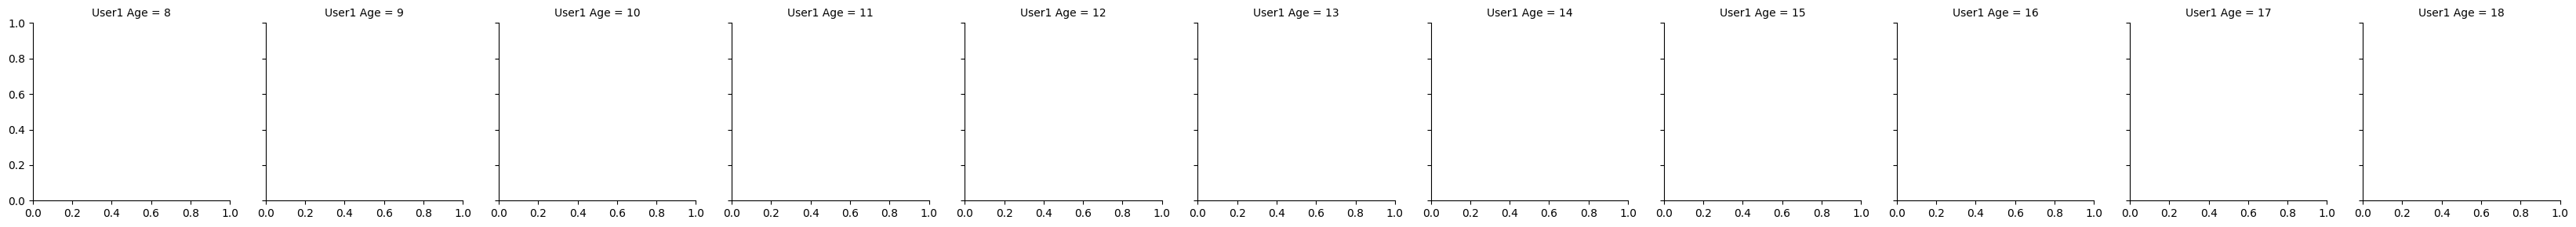

In [11]:
import seaborn as sns
df_pan = df.to_pandas()
g = sns.FacetGrid(df_pan, col= )
g

In [10]:
df_pan

,User1 ID,User2 ID,User1 Age,User2 Age,User1 Grade,User2 Grade,User1 Gender,User2 Gender,User1 Gender_encoded,User2 Gender_encoded,Message,Label
0,1,2,11,15,5,9,Others,Male,2,1,bye bye dear bajaj i got some better work to ...,1
1,1,2,11,15,5,9,Others,Male,2,1,Haha your so funny you sit on wikipedia all da...,1
2,1,2,11,15,5,9,Others,Male,2,1,My problem is people talking out of their asse...,1
3,1,2,11,15,5,9,Others,Male,2,1,Article updated,0
4,1,2,11,15,5,9,Others,Male,2,1,Well arent you phucking special Its easy to ha...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
90351,100,98,17,10,11,4,Others,Others,2,2,No youre right it was a lame idea,0
90352,100,99,17,11,11,5,Others,Others,2,2,break stuff did you really break things when...,0
90353,100,99,17,11,11,5,Others,Others,2,2,Stifle You might like to consult this page,0
90354,100,99,17,11,11,5,Others,Others,2,2,Since the admin has already blocked MOVE of th...,0


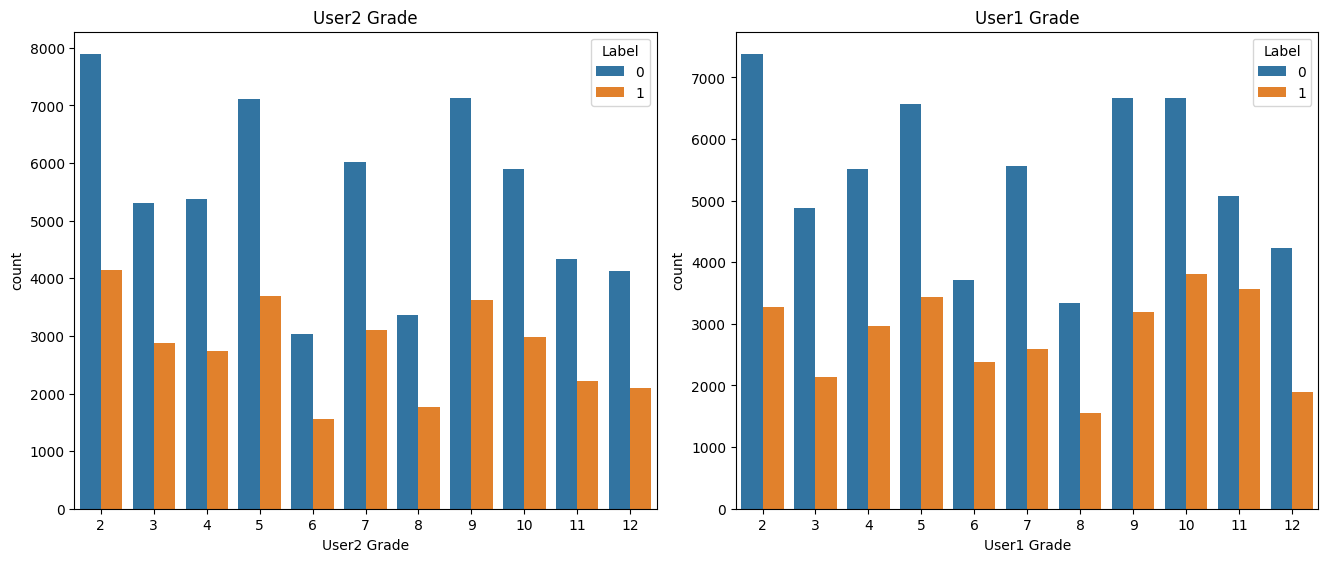

In [80]:
columns = {col for col in df.columns if col.endswith("Grade")}
sns.color_palette("hls", 8)
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.countplot(data=df, x= col, ax=axes[i], hue= "Label")
    axes[i].set_title(f"{col}")

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

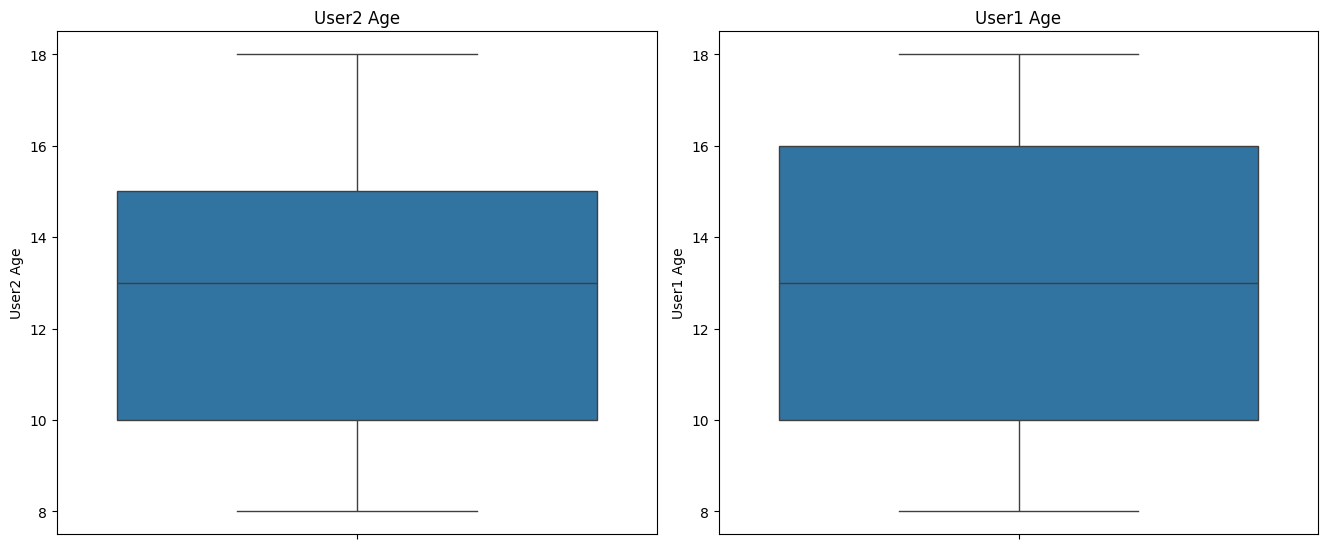

In [67]:
columns = {col for col in df.columns if col.endswith("Age")}
sns.color_palette("hls", 8)
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.boxplot(data=df, y= col, ax=axes[i])
    axes[i].set_title(f"{col}")

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

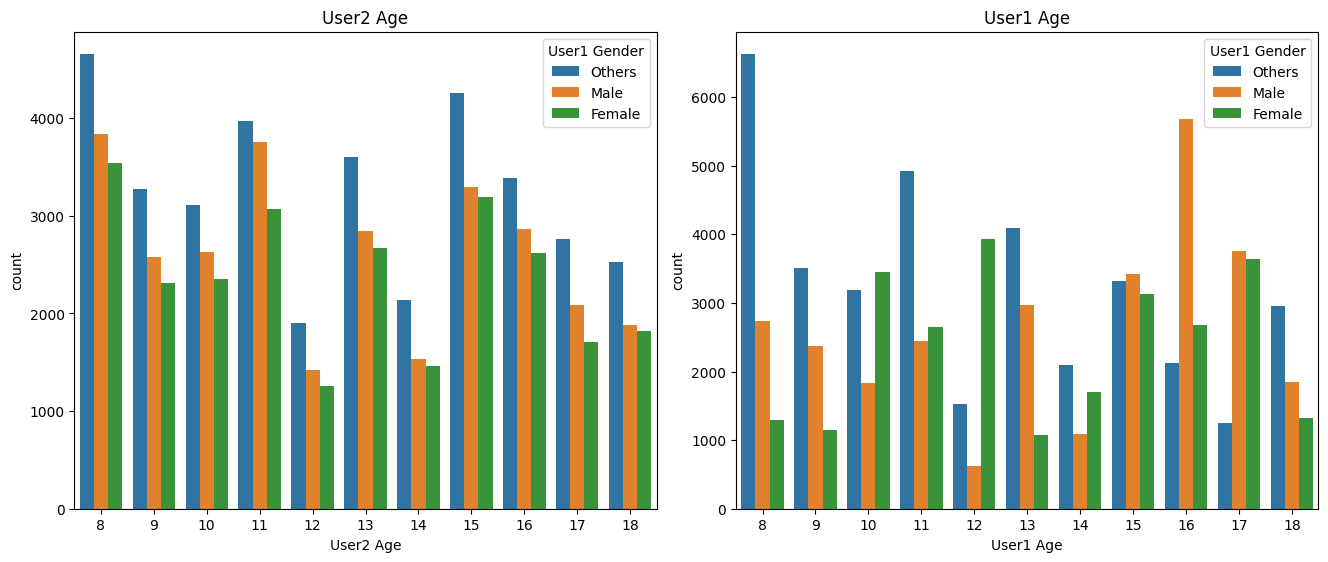

In [78]:
columns = {col for col in df.columns if col.endswith("Age")}
sns.color_palette("hls", 8)
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.countplot(data=df, x= col, hue= "User1 Gender", ax=axes[i])
    axes[i].set_title(f"{col}")

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

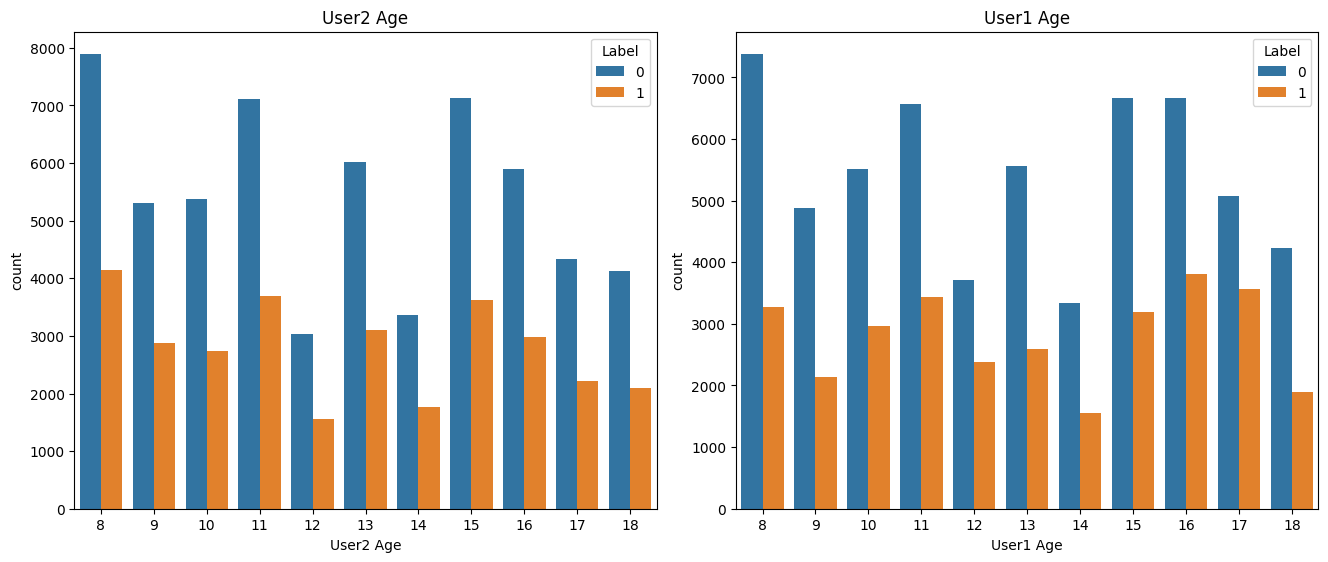

In [81]:
columns = {col for col in df.columns if col.endswith("Age")}
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.countplot(data=df, x= col, hue= "Label", ax=axes[i])
    axes[i].set_title(f"{col}")

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()